# K Means Clustering

The k-means clustering algorithm as described in the README.md file will be categorize countries and their economic health along with their development. Here, I will use two socioeconomic metrics, GDP per capital and life expectancy. For the k-means clustering implementation, I will be using the KMeans algorithm in scikit-learn and investigate the categorization of some of a country's socioeconomic metrics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read csv file with all country transit and socioeconomic data
df = pd.read_csv("Data/HDIData.csv")

In [3]:
# clean up data file

# isolate the following features:
#		Unemployment, total (% of total labor force)
#		Life expectancy at birth, female (years)

row_ind = [1463, 763]
col_filled = ~df.loc[row_ind].isin([".."]).any() # only keep countries with nonempty rows

fil_df = df.loc[row_ind, col_filled] # create new data table with isolated rows
fil_df.head()

,Time,Time Code,Series Name,Series Code,Argentina [ARG],Australia [AUS],Brazil [BRA],China [CHN],France [FRA],Germany [DEU],...,Uganda [UGA],Ukraine [UKR],United Arab Emirates [ARE],Uruguay [URY],Uzbekistan [UZB],Vanuatu [VUT],Viet Nam [VNM],West Bank and Gaza [PSE],Zambia [ZMB],Zimbabwe [ZWE]
1463,2019,YR2019,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,9.843,5.143,11.936,5.15,8.415,3.163,...,2.563,8.194,2.331,8.836,8.98,5.445,1.681,25.34,5.538,7.373
763,2019,YR2019,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,79.439,85,79.023,80.747,85.9,83.7,...,69.13,78.73,84.047,81.293,75.374,73.292,78.972,78.092,65.44,63.049


In [4]:
# transform data file and delete time/labels for correlations
df_transposed = fil_df.T
df_transposed.columns = df_transposed.iloc[2]
df_kmeans = df_transposed.iloc[4:,:]
df_kmeans = df_kmeans.astype(float)

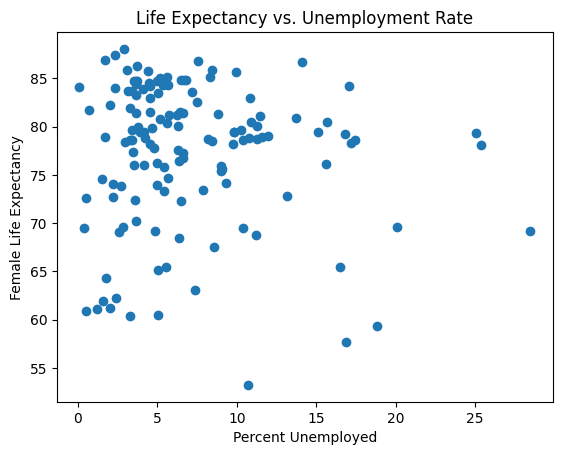

In [5]:
# graph relationship
plt.figure()
plt.scatter(df_kmeans.iloc[:, 0], df_kmeans.iloc[:, 1])
plt.title ('Life Expectancy vs. Unemployment Rate')
plt.xlabel ('Percent Unemployed')
plt.ylabel ('Female Life Expectancy')
plt.show ()

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Silhouette Score: 0.48


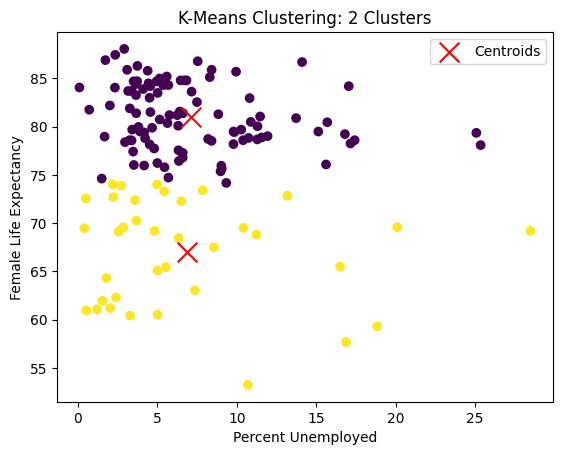

Silhouette Score: 0.43


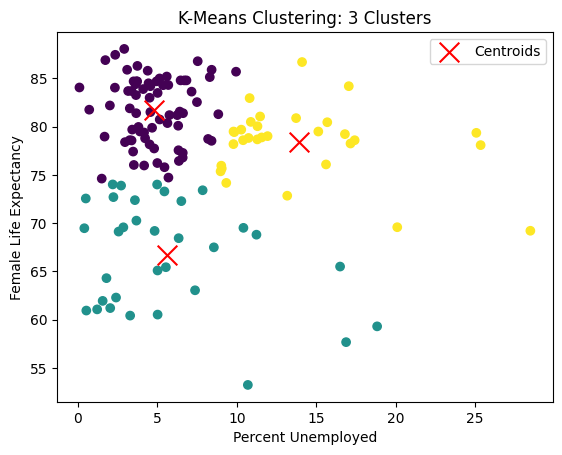

Silhouette Score: 0.43


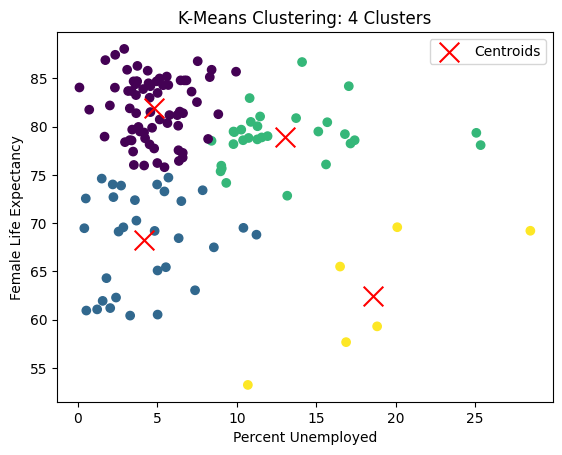

Silhouette Score: 0.36


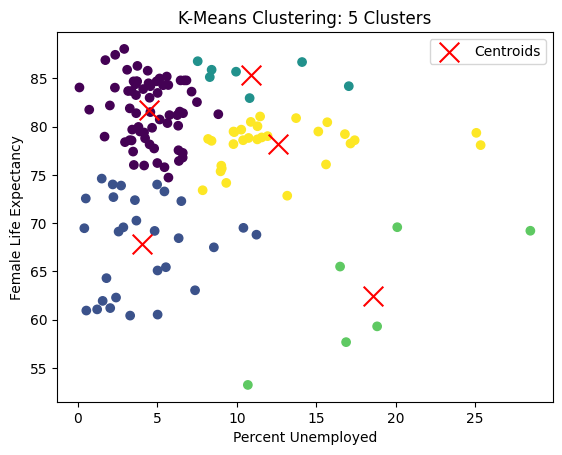

In [13]:
for i in range(2, 6):
	# initialize and fit the KMeans model
	kmeans = KMeans(n_clusters=i, random_state=42)
	kmeans.fit(df_kmeans)

	# get the cluster labels
	labels = kmeans.labels_
	# silhouette score, -1 is poor and +1 is ideal
	score = silhouette_score(df_kmeans, kmeans.labels_)
	print(f'Silhouette Score: {score:.2f}')

	# get the coordinates of the cluster centers
	centroids = kmeans.cluster_centers_

	# plot the results
	plt.figure()
	plt.scatter(df_kmeans.iloc[:, 0], df_kmeans.iloc[:, 1], c=labels)
	plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
	plt.title(f"K-Means Clustering: {i} Clusters")
	plt.xlabel("Percent Unemployed")
	plt.ylabel("Female Life Expectancy")
	plt.legend()
	plt.show()

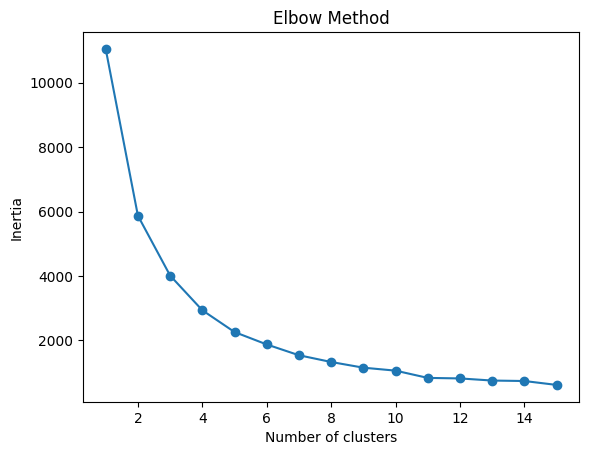

In [8]:
# elbow method

inertias = []
for k in range(1, 16):
    km = KMeans(n_clusters=k).fit(df_kmeans)
    inertias.append(km.inertia_)

plt.plot(range(1, 16), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### Conclusion

From k-means clustering, it is evident that the points on the life expectancy vs. umemployment rate scatter plot can be divided into various clusters. For all number of clusters, there is a group of points at the top left that signifies low unemployment and high life expectancy. These are the countries that are likely the most socially and economically stable. Depending on how many clusters are set, there are usually a few clusters around that top left group and when n is set higher, there is a group of countries that have higher unemployment rates and lower life expectancy. These are the countries that are likely less socially and economically stable. However, it is interesting to note that most countries in this dataset have unemployment rates an life expectancies that fall within the same range.

The silhouette score tells us that points are somewhat well matched to their own cluster, and poorly matched to neighboring clusters. Two clusters has the silhouette score closest to 1 at 0.48, but this data set may not be that easily separable. When analyzing the elbow method graph, it seems as when we get to 10 or so clusters, additional clusters don’t significantly reduce inertia.